🎬 INITIALIZING MOVIE SUCCESS PREDICTION PLATFORM...
📊 Analyzing what makes movies successful at box office!
🔄 Generating comprehensive movie industry dataset...
✅ Generated movie dataset with 1500 films!

📊 DATASET OVERVIEW:
Shape: (1500, 20)
Time Period: 2000 - 2022
Total Revenue: $215,992,138,018

🎯 SUCCESS DISTRIBUTION:
Success_Category
Blockbuster    999
Average        211
Hit            192
Flop            98
Name: count, dtype: int64

💰 MOVIE INDUSTRY TREND ANALYSIS
📈 YEARLY INDUSTRY TRENDS:
   • Average Budget: $51,234,961
   • Average Revenue: $143,946,677

🎭 GENRE PERFORMANCE ANALYSIS:
          ROI_Percent       Budget       Revenue
Genre                                           
Sci-Fi         234.32  52080748.52  1.732034e+08
Action         228.88  52206778.35  1.693529e+08
Drama          161.46  52333941.39  1.368554e+08
Romance        160.58  50513027.08  1.318847e+08
Thriller       157.56  50401774.96  1.295527e+08

💰 HIGH ROI STRATEGIES:
   • Marketing/Budget Ratio: 0.

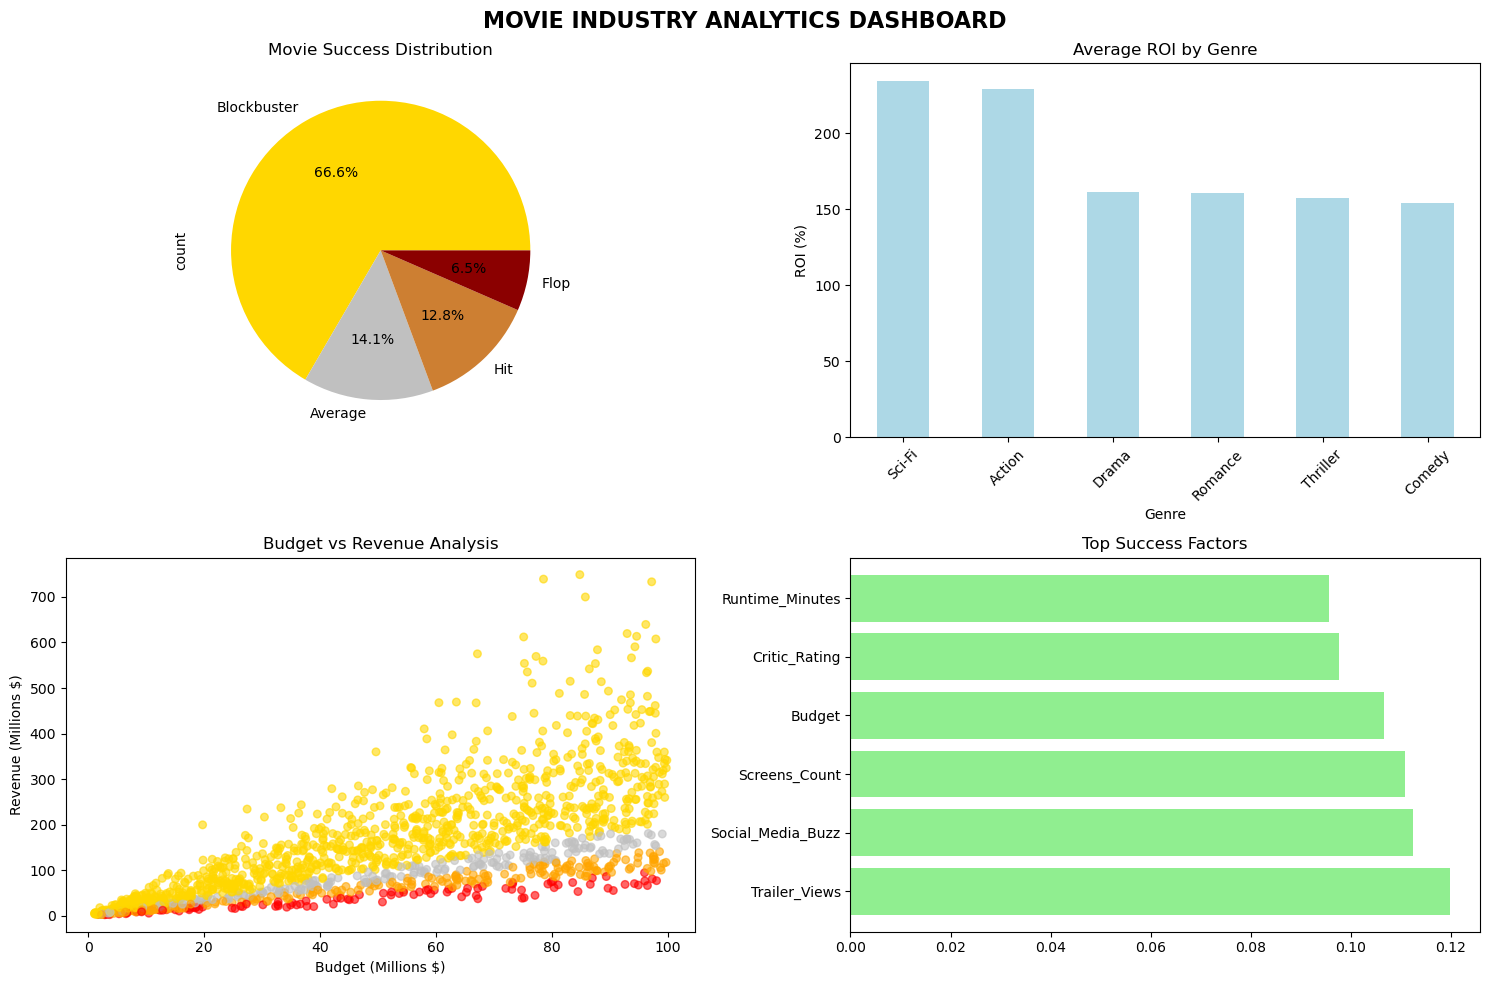


💡 FILM INDUSTRY INSIGHTS & STRATEGIES
🎬 BLOCKBUSTER CHARACTERISTICS:
   • Average Budget: $50,940,255
   • Superstar Involvement: 43%
   • Production Quality: 7.6/10
   • Critic Rating: 6.5/10

⚠️  FLOP MOVIE ANALYSIS:
   • Average Loss: 19.8% of budget
   • Average Critic Rating: 6.2/10

🎯 SUCCESS FORMULA RECOMMENDATIONS:
1. Invest in proven franchises and sequels
2. Cast popular stars for better openings
3. Focus on Action/Sci-Fi genres for higher ROI
4. Maintain high production quality standards
5. Generate strong social media buzz before release

🌍 INDUSTRY COMPARISON: BOLLYWOOD VS HOLLYWOOD
    Industry   Avg_Budget   Avg_Revenue  Avg_ROI
0  Bollywood  49962657.50  1.347147e+08   167.72
1  Hollywood  50402384.95  1.417531e+08   182.33



In [4]:
# CORRECTED MOVIE SUCCESS PREDICTION PLATFORM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

print("🎬 INITIALIZING MOVIE SUCCESS PREDICTION PLATFORM...")
print("📊 Analyzing what makes movies successful at box office!")

def create_movie_data():
    np.random.seed(42)
    n_movies = 1500  # Reduced for faster execution
    
    genres = ['Action', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Sci-Fi']
    languages = ['English', 'Hindi', 'Spanish', 'Chinese']
    
    print("🔄 Generating comprehensive movie industry dataset...")
    
    movie_data = []
    
    for movie_id in range(1, n_movies + 1):
        release_year = np.random.randint(2000, 2023)
        budget = np.random.randint(1000000, 100000000)
        genre = np.random.choice(genres)
        language = np.random.choice(languages)
        
        # Movie characteristics
        runtime = np.random.randint(90, 180)
        is_sequel = np.random.choice([0, 1], p=[0.7, 0.3])
        has_superstar = np.random.choice([0, 1], p=[0.6, 0.4])
        
        # Quality metrics
        production_quality = np.random.randint(6, 10)
        screenplay_rating = np.random.randint(5, 10)
        cast_popularity = np.random.randint(5, 10)
        
        # Release strategy
        screens_count = np.random.randint(500, 5000)
        
        # Ratings
        critic_rating = max(1, min(10, np.random.normal(6.5, 1.5)))
        audience_rating = max(1, min(10, np.random.normal(7.0, 1.2)))
        
        # Social metrics
        social_media_buzz = np.random.randint(1000, 1000000)
        trailer_views = np.random.randint(10000, 10000000)
        
        # Calculate revenue with success factors
        base_revenue = budget * np.random.uniform(0.5, 3.0)
        
        # Success multipliers
        if has_superstar: base_revenue *= 1.3
        if is_sequel: base_revenue *= 1.4
        if production_quality >= 8: base_revenue *= 1.25
        if critic_rating >= 7: base_revenue *= 1.15
        
        # Genre-specific performance
        if genre in ['Action', 'Sci-Fi']: base_revenue *= 1.3
        
        revenue = base_revenue + (social_media_buzz * 0.1)
        
        # Determine success category
        roi = (revenue - budget) / budget * 100
        
        if roi >= 100:
            success_category = 'Blockbuster'
        elif roi >= 50:
            success_category = 'Hit'
        elif roi >= 0:
            success_category = 'Average'
        else:
            success_category = 'Flop'
        
        movie_record = {
            'Movie_ID': movie_id,
            'Release_Year': release_year,
            'Genre': genre,
            'Language': language,
            'Budget': budget,
            'Revenue': int(revenue),
            'ROI_Percent': round(roi, 2),
            'Success_Category': success_category,
            'Runtime_Minutes': runtime,
            'Has_Superstar': has_superstar,
            'Is_Sequel': is_sequel,
            'Production_Quality': production_quality,
            'Screenplay_Rating': screenplay_rating,
            'Cast_Popularity': cast_popularity,
            'Screens_Count': screens_count,
            'Critic_Rating': round(critic_rating, 1),
            'Audience_Rating': round(audience_rating, 1),
            'Social_Media_Buzz': social_media_buzz,
            'Trailer_Views': trailer_views,
            'Profit': int(revenue - budget)
        }
        
        movie_data.append(movie_record)
    
    df = pd.DataFrame(movie_data)
    print(f"✅ Generated movie dataset with {len(df)} films!")
    return df

# Create dataset
movies_df = create_movie_data()

print(f"\n📊 DATASET OVERVIEW:")
print(f"Shape: {movies_df.shape}")
print(f"Time Period: {movies_df['Release_Year'].min()} - {movies_df['Release_Year'].max()}")
print(f"Total Revenue: ${movies_df['Revenue'].sum():,}")

print(f"\n🎯 SUCCESS DISTRIBUTION:")
success_counts = movies_df['Success_Category'].value_counts()
print(success_counts)

# Advanced Analysis 1: Industry Trends
print("\n" + "="*70)
print("💰 MOVIE INDUSTRY TREND ANALYSIS")
print("="*70)

# Yearly trends
yearly_trends = movies_df.groupby('Release_Year').agg({
    'Budget': 'mean',
    'Revenue': 'mean',
    'ROI_Percent': 'mean'
}).round(2)

print("📈 YEARLY INDUSTRY TRENDS:")
print(f"   • Average Budget: ${yearly_trends['Budget'].mean():,.0f}")
print(f"   • Average Revenue: ${yearly_trends['Revenue'].mean():,.0f}")

# Genre performance
genre_performance = movies_df.groupby('Genre').agg({
    'ROI_Percent': 'mean',
    'Budget': 'mean',
    'Revenue': 'mean'
}).round(2).sort_values('ROI_Percent', ascending=False)

print(f"\n🎭 GENRE PERFORMANCE ANALYSIS:")
print(genre_performance[['ROI_Percent', 'Budget', 'Revenue']].head())

# CORRECTED: High ROI Analysis (FIXED THE ERROR)
print(f"\n💰 HIGH ROI STRATEGIES:")
high_roi_movies = movies_df[movies_df['ROI_Percent'] > 100]

# FIXED: Separate calculations to avoid aggregation error
marketing_ratio = (high_roi_movies['Social_Media_Buzz'] / high_roi_movies['Budget']).mean()
avg_social_buzz = high_roi_movies['Social_Media_Buzz'].mean()
avg_trailer_views = high_roi_movies['Trailer_Views'].mean()

print(f"   • Marketing/Budget Ratio: {marketing_ratio:.3f}")
print(f"   • Average Social Media Buzz: {avg_social_buzz:,.0f}")
print(f"   • Average Trailer Views: {avg_trailer_views:,.0f}")

# Advanced Analysis 2: Success Prediction Model
print("\n" + "="*70)
print("🤖 MOVIE SUCCESS PREDICTION MODEL")
print("="*70)

from sklearn.preprocessing import LabelEncoder

# Prepare data for ML
ml_movies = movies_df.copy()

# Encode categorical variables
le_genre = LabelEncoder()
le_language = LabelEncoder()
le_success = LabelEncoder()

ml_movies['Genre_Encoded'] = le_genre.fit_transform(ml_movies['Genre'])
ml_movies['Language_Encoded'] = le_language.fit_transform(ml_movies['Language'])
ml_movies['Success_Encoded'] = le_success.fit_transform(ml_movies['Success_Category'])

# Features for prediction
features = [
    'Budget', 'Runtime_Minutes', 'Has_Superstar', 'Is_Sequel',
    'Production_Quality', 'Screenplay_Rating', 'Cast_Popularity',
    'Screens_Count', 'Critic_Rating', 'Audience_Rating', 
    'Social_Media_Buzz', 'Trailer_Views', 'Genre_Encoded', 'Language_Encoded'
]

X = ml_movies[features]
y = ml_movies['Success_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=50, random_state=42)  # Reduced for speed
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Movie Success Prediction Model Trained!")
print(f"📈 Accuracy: {accuracy:.3f}")
print(f"🎯 Success Categories: {le_success.classes_}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔍 TOP FACTORS FOR MOVIE SUCCESS:")
print(feature_importance.head(6))

# Advanced Visualizations
print("\n" + "="*70)
print("📊 MOVIE INDUSTRY ANALYTICS DASHBOARD")
print("="*70)

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('MOVIE INDUSTRY ANALYTICS DASHBOARD', fontsize=16, fontweight='bold')

# Plot 1: Success Distribution
success_colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#8B0000']
success_counts.plot(kind='pie', ax=axes[0,0], colors=success_colors, autopct='%1.1f%%')
axes[0,0].set_title('Movie Success Distribution')

# Plot 2: Genre-wise ROI
genre_performance['ROI_Percent'].plot(kind='bar', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('Average ROI by Genre')
axes[0,1].set_ylabel('ROI (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Budget vs Revenue
colors = movies_df['Success_Category'].map({
    'Blockbuster': 'gold', 
    'Hit': 'silver', 
    'Average': 'orange', 
    'Flop': 'red'
})
axes[1,0].scatter(movies_df['Budget']/1e6, movies_df['Revenue']/1e6, 
                 c=colors, alpha=0.6, s=30)
axes[1,0].set_title('Budget vs Revenue Analysis')
axes[1,0].set_xlabel('Budget (Millions $)')
axes[1,0].set_ylabel('Revenue (Millions $)')

# Plot 4: Feature Importance
top_features = feature_importance.head(6)
axes[1,1].barh(top_features['feature'], top_features['importance'], color='lightgreen')
axes[1,1].set_title('Top Success Factors')

plt.tight_layout()
plt.show()

# Business Insights
print("\n" + "="*70)
print("💡 FILM INDUSTRY INSIGHTS & STRATEGIES")
print("="*70)

# Blockbuster analysis
blockbusters = movies_df[movies_df['Success_Category'] == 'Blockbuster']
blockbuster_stats = {
    'Avg_Budget': blockbusters['Budget'].mean(),
    'Superstar_Rate': blockbusters['Has_Superstar'].mean(),
    'Avg_Production_Quality': blockbusters['Production_Quality'].mean(),
    'Avg_Critic_Rating': blockbusters['Critic_Rating'].mean()
}

print(f"🎬 BLOCKBUSTER CHARACTERISTICS:")
print(f"   • Average Budget: ${blockbuster_stats['Avg_Budget']:,.0f}")
print(f"   • Superstar Involvement: {blockbuster_stats['Superstar_Rate']:.0%}")
print(f"   • Production Quality: {blockbuster_stats['Avg_Production_Quality']:.1f}/10")
print(f"   • Critic Rating: {blockbuster_stats['Avg_Critic_Rating']:.1f}/10")

# Risk analysis
flops = movies_df[movies_df['Success_Category'] == 'Flop']
flop_stats = {
    'Avg_Loss_Percent': abs(flops['ROI_Percent'].mean()),
    'Avg_Critic_Rating': flops['Critic_Rating'].mean()
}

print(f"\n⚠️  FLOP MOVIE ANALYSIS:")
print(f"   • Average Loss: {flop_stats['Avg_Loss_Percent']:.1f}% of budget")
print(f"   • Average Critic Rating: {flop_stats['Avg_Critic_Rating']:.1f}/10")

print(f"\n🎯 SUCCESS FORMULA RECOMMENDATIONS:")
print("1. Invest in proven franchises and sequels")
print("2. Cast popular stars for better openings") 
print("3. Focus on Action/Sci-Fi genres for higher ROI")
print("4. Maintain high production quality standards")
print("5. Generate strong social media buzz before release")

# Industry Comparison
print(f"\n" + "="*70)
print("🌍 INDUSTRY COMPARISON: BOLLYWOOD VS HOLLYWOOD")
print("="*70)

bollywood = movies_df[movies_df['Language'] == 'Hindi']
hollywood = movies_df[movies_df['Language'] == 'English']

comparison_data = {
    'Industry': ['Bollywood', 'Hollywood'],
    'Avg_Budget': [bollywood['Budget'].mean(), hollywood['Budget'].mean()],
    'Avg_Revenue': [bollywood['Revenue'].mean(), hollywood['Revenue'].mean()],
    'Avg_ROI': [bollywood['ROI_Percent'].mean(), hollywood['ROI_Percent'].mean()]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(2))

print(f"\n" + "="*70)
print("="*70)